In [8]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/best-cnn-model.keras', compile=False)


Mounted at /content/drive


In [10]:
model.layers

[<Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [12]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [14]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.019628568 0.23469645


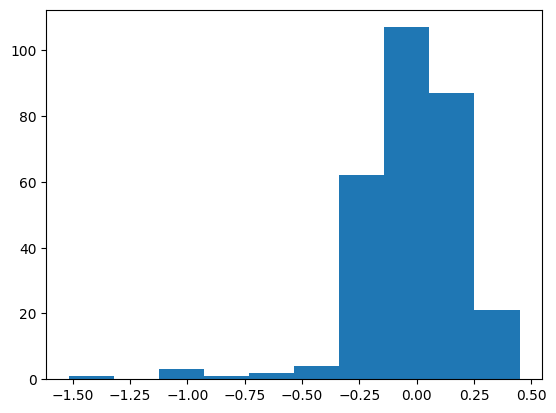

In [16]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1,1))
plt.show()

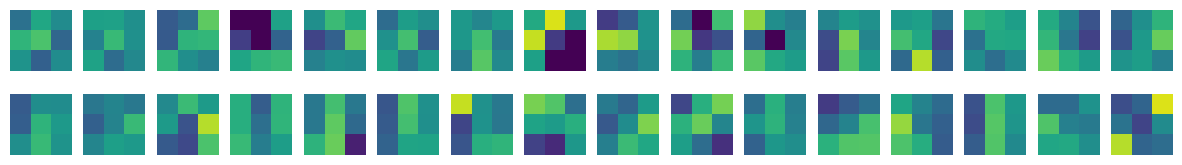

In [19]:
fig, axs = plt.subplots(2,16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [21]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Input(shape=(28,28,1)))
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))

In [24]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [26]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0006075013 0.08037839


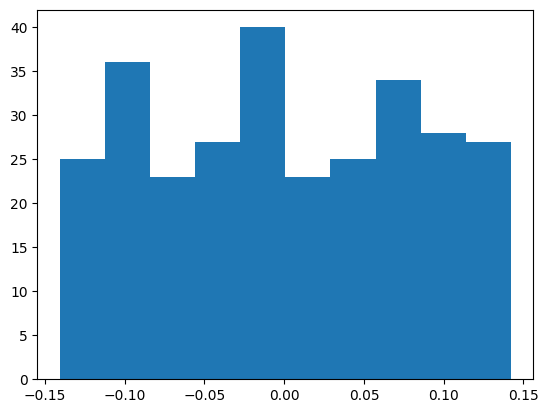

In [28]:
plt.hist(no_training_weights.reshape(-1,1))
plt.show()

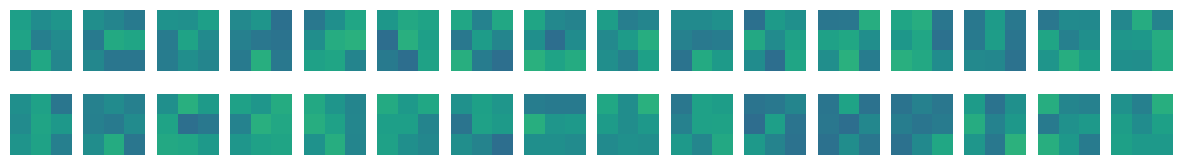

In [30]:
fig, axs = plt.subplots(2,16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [31]:
inputs = keras.Input(shape=(784,))
dense1 = keras.layers.Dense(100, activation='relu')
dense2 = keras.layers.Dense(10, activation='softmax')


In [33]:
hidden = dense1(inputs)

In [35]:
outputs = dense2(hidden)

In [37]:
func_model = keras.Model(inputs, outputs)

In [39]:
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, ragged=False, name=input_layer_1>]


In [40]:
conv_acti = keras.Model(model.inputs[0], model.layers[0].output)

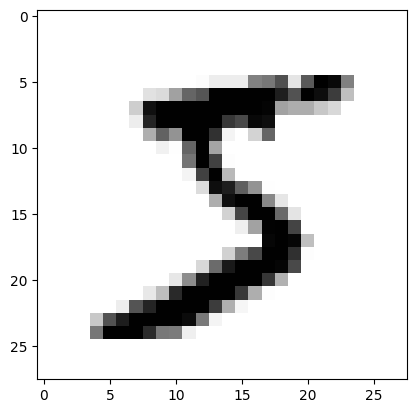

In [42]:
(train_input, train_target), (test_input, test_target) = keras.datasets.mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [44]:
what = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv_acti.predict(what)
print(feature_maps.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
(1, 28, 28, 32)


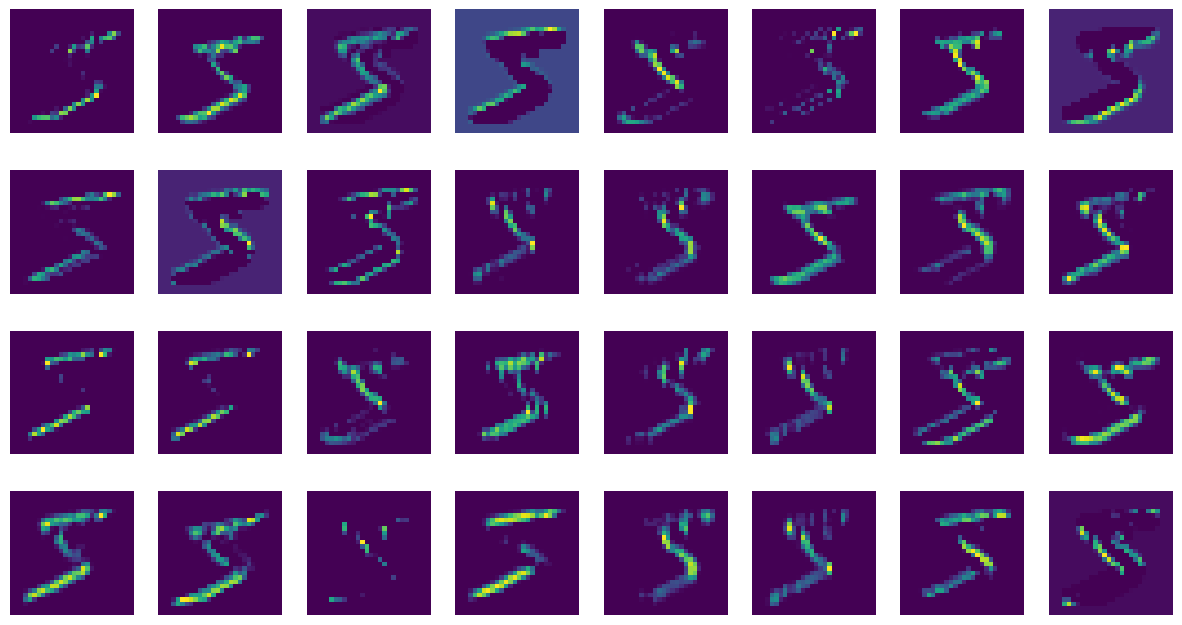

In [45]:
fig, axs = plt.subplots(4,8, figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()